# SMS Spam Detection using Machine Learning

This project builds a text classification system to classify SMS messages as **Spam** or **Ham** using classical machine learning techniques.

In [2]:
import pandas as pd
import numpy as np

##  Import Required Libraries

In [13]:
df=pd.read_csv("../data/spam.csv",encoding="latin-1")

In [14]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [15]:
df=df[["v1","v2"]]

In [16]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [19]:
df.columns=["labels","message"]
df.head()

,labels,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
df["labels"].value_counts().reset_index()

,labels,count
0,ham,4825
1,spam,747


## Text Preprocessing


In [22]:
import nltk
import re

In [23]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anuna\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [24]:
from nltk.corpus import stopwords

stop_words=set(stopwords.words("english"))

def preprocess_text(text):

    # convert to lowercase
    text=text.lower()
    
    # remove punctuation and numbers
    text= re.sub(r'[^a-z\s]', '',text)

    # tokenize
    words=text.split()

    # remove stopwords
    words=[word for word in words if word not in stop_words]

    return ' '.join(words)

In [29]:
df['clean_message']=df['message'].apply(preprocess_text)

df

,labels,message,clean_message
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think goes usf lives around though
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,nd time tried contact u u pound prize claim ea...
5568,ham,Will Ì_ b going to esplanade fr home?,b going esplanade fr home
5569,ham,"Pity, * was in mood for that. So...any other s...",pity mood soany suggestions
5570,ham,The guy did some bitching but I acted like i'd...,guy bitching acted like id interested buying s...


In [33]:
df.columns

Index(['labels', 'message', 'clean_message'], dtype='object')

In [34]:
df.rename(columns={'labels':'label'}, inplace=True)

In [35]:
df.columns

Index(['label', 'message', 'clean_message'], dtype='object')

## Feature Extraction using TF-IDF


In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [40]:
tfidf=TfidfVectorizer(max_features=3000)

x=tfidf.fit_transform(df['message'])

y=df['label']

In [41]:
x.shape

(5572, 3000)

## Train-Test Split


In [43]:
from sklearn.model_selection import train_test_split

In [45]:
x_train,x_test,y_train,y_test=train_test_split(
    x,y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

##  Model Training – Naive Bayes (Baseline)


In [46]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix

In [47]:
nb=MultinomialNB()
nb.fit(x_train,y_train)

y_pred_nb=nb.predict(x_test)

## Model Evaluation- Naive Bayes (Baseline)


In [48]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       966
        spam       0.99      0.80      0.88       149

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.93      1115
weighted avg       0.97      0.97      0.97      1115



In [49]:
confusion_matrix(y_test,y_pred_nb)

array([[965,   1],
       [ 30, 119]])

##  Confusion Matrix Visualization-  Naive Bayes (Baseline)


In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

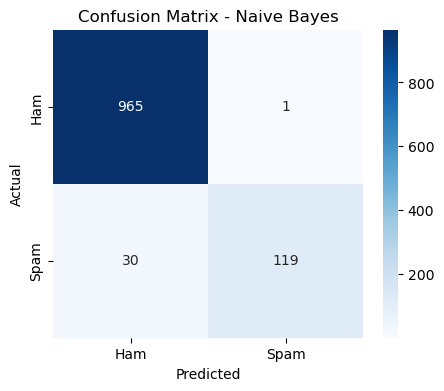

In [59]:
cm = confusion_matrix(y_test, y_pred_nb)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Ham', 'Spam'],
            yticklabels=['Ham', 'Spam'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()


##  Model Training – Logistic Regression


In [50]:
from sklearn.linear_model import LogisticRegression

In [53]:
lr = LogisticRegression(max_iter=1000)
lr.fit(x_train, y_train)

y_pred_lr = lr.predict(x_test)

## Model Evaluation – Logistic Regression


In [54]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       966
        spam       0.99      0.81      0.89       149

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.94      1115
weighted avg       0.97      0.97      0.97      1115



In [55]:
confusion_matrix(y_test, y_pred_lr)

array([[965,   1],
       [ 29, 120]])

##  Confusion Matrix Visualization – Logistic Regression

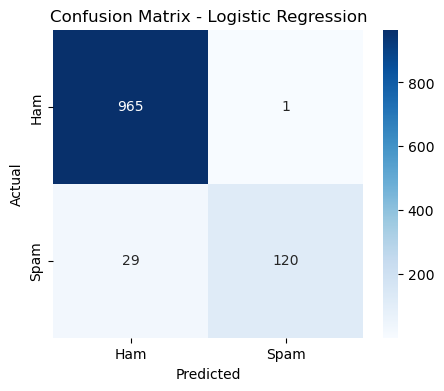

In [57]:
cm = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Ham', 'Spam'],
            yticklabels=['Ham', 'Spam'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()


## Observations and Conclusion

- Logistic Regression slightly outperformed Naive Bayes in terms of recall and F1-score.
- Accuracy alone was not sufficient due to class imbalance.
- TF-IDF helped reduce the impact of common words.
